# NetworkX Tutorial Notebook

This tutorial is based on the [guided introduction](https://networkx.org/documentation/stable/tutorial.html) to the [**NetworkX** python library](https://networkx.org/documentation/stable/index.html).

## 0. Getting started

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
# We can check the size of a graph by printing it.
print(G)

Graph with 0 nodes and 0 edges


By definition, a [Graph](https://networkx.org/documentation/stable/reference/classes/graph.html#networkx.Graph) is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

## 1. Nodes
We start out simple by seing how we can manually add nodes to our graph.

In [4]:
G.add_node(1)
print(G)

Graph with 1 nodes and 0 edges


In [5]:
G.add_nodes_from([2, 3])
print(G)

Graph with 3 nodes and 0 edges


In [6]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])
print(G)

Graph with 5 nodes and 0 edges


We can then combine two graphs in a set of ways. We may use the nodes from H to create the nodes in G or append H as a new node in G.

In [7]:
H = nx.path_graph(10)
print(H)

Graph with 10 nodes and 9 edges


In [8]:
G.add_nodes_from(H)
print(G)

Graph with 10 nodes and 0 edges


In [9]:
G.add_node(H)
print(G)

Graph with 11 nodes and 0 edges


## 2. Edges
Again, we can manually create links/edges between nodes using the library functions.

We could add a single edge:

In [10]:
G.add_edge(1, 2)
print(G)

e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
print(G)

Graph with 11 nodes and 1 edges
Graph with 11 nodes and 2 edges


In [11]:
# Note: unpacking returns the values stored in a datatype:
print(e)  # (2, 3)
print(*e) # 2 3

(2, 3)
2 3


or we could add a list of edges:

In [12]:
G.add_edges_from([(1,2), (1,3)]) # Note: G already has the edge (1,2). Thus, this is simply ignored. 
print(G)

Graph with 11 nodes and 3 edges


In [13]:
e1 = (1,4)
e2 = (1,5)
edges = [e1, e2]

G.add_edges_from(edges)
print(G)

Graph with 11 nodes and 5 edges


We can again copy another graph and this time use it's edges: 

In [14]:
G.add_edges_from(H.edges) # Note: duplicate edges are ignored.
print(G)

Graph with 11 nodes and 12 edges


To start over, we can clear the graph:

In [15]:
G.clear()
print(G)

Graph with 0 nodes and 0 edges


In [16]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

We can check the number of nodes and edges:

In [17]:
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")
print(G)

Nodes: 8
Edges: 3
Graph with 8 nodes and 3 edges


## 3. Examining elements of a graph
To examine the content of a graph, we can look at all the nodes and edges as well as each node's adjacent/neighbouring nodes and degree, i.e. number of edges for a given node.

In [18]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [19]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [20]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [21]:
G.degree[1]  # the number of edges incident to 1

2

We can check subsets of nodes from a graph and look at their edges and degrees:

In [22]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [23]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

## 4. Removing elements from a graph
We can manually remove nodes or edges from a graph, either one by one or in sets.

In [24]:
G.remove_node(2) # node '2' removed
G.remove_nodes_from("spam") # nodes 's', 'p', 'a' and 'm' removed
list(G.nodes)

[1, 3, 'spam']

In [25]:
list(G.edges)

[(1, 3)]

In [26]:
G.remove_edge(1, 3)
list(G.edges)

[]

## 5. Using the graph constructors
The NeworkX library contains a set of [Graph Types](https://networkx.org/documentation/stable/reference/classes/index.html), making a graph either directed or undirected, and single edged or multiple parallel edged.

In [27]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [28]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [29]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

## 6. Accessing edges and neighbors
In addition to the views Graph.edges, and Graph.adj, access to edges and neighbors is possible using _**subscript notation**_.

In [30]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [31]:
G[1][2]

{'color': 'yellow'}

In [32]:
G.edges[1, 2]

{'color': 'yellow'}

In [33]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

Fast examination of all (node, adjacency) pairs is achieved using `G.adjacency()`, or `G.adj.items()`. Note that for undirected graphs, adjacency iteration sees each edge twice.

In [34]:
FG = nx.Graph()

# Add edges with weight
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

# GLOSSARY
# n    : node
# nbrs : neighbours/adjecent nodes and edges  
# nbr  : neighbour/adjecent node
# eattr: Edge attribute

for n, nbrs in FG.adj.items():
                                                #print(f"n: {n}, nbrs: {nbrs}")
    for nbr, eattr in nbrs.items():
                                                #print(f"nbr: {nbr}, eattr: {eattr}")
        wt = eattr['weight']
        if wt < 0.5: 
            print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [35]:
FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

In [36]:
# Extract the weight value of the edge from 2 into 1.
list(FG.adj[2][1].items())[0][1]

0.125

We can also check all edges in the graph and fetch any which hold true for some statement or value:

In [37]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})") # <--- :.3 rounds the value to 3 decimals

(1, 2, 0.125)
(3, 4, 0.375)


In [38]:
FG.edges.data('weight')

EdgeDataView([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

## 7. Attributes
An attribute can be any kind of information that we want to associate with a graph or nodes. 

### 7.1 Graph Attributes

In [39]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [40]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### 7.2 Node Attributes

In [41]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [42]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

### 7.3 Edge Attributes

In [43]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [44]:
G.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 4.7, 'color': 'blue'}}, 3: {4: {'color': 'red', 'weight': 4.2}, 2: {'weight': 8}}, 2: {1: {'weight': 4.7, 'color': 'blue'}, 3: {'weight': 8}}, 4: {3: {'color': 'red', 'weight': 4.2}, 5: {'color': 'red'}}, 5: {4: {'color': 'red'}}}))

## 8. Directed graphs
The [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html#networkx.DiGraph) class provides additional methods and properties specific to directed edges, e.g., [`DiGraph.out_edges`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_edges.html#networkx.DiGraph.out_edges), [`DiGraph.in_degree`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html#networkx.DiGraph.in_degree), [`DiGraph.predecessors()`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.predecessors.html#networkx.DiGraph.predecessors), [`DiGraph.successors()`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.successors.html#networkx.DiGraph.successors) etc. To allow algorithms to work with both classes easily, the directed versions of [`neighbors`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.neighbors.html#networkx.DiGraph.neighbors) is equivalent to [`successors`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.successors.html#networkx.DiGraph.successors) while [`DiGraph.degree`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.degree.html#networkx.DiGraph.degree) reports the sum of [`DiGraph.in_degree`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html#networkx.DiGraph.in_degree) and [`DiGraph.out_degree`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html#networkx.DiGraph.out_degree) even though that may feel inconsistent at times.

In [45]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [46]:
DG.degree(1, weight='weight')

1.25

In [47]:
list(DG.successors(1))

[2]

In [48]:
list(DG.neighbors(1))

[2]

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using [`Graph.to_undirected()`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.to_undirected.html#networkx.Graph.to_undirected) or with

In [49]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

## 9. Multigraphs



NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The [`MultiGraph`](https://networkx.org/documentation/stable/reference/classes/multigraph.html#networkx.MultiGraph) and [`MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html#networkx.MultiDiGraph) classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., [`MultiGraph.degree()`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.MultiGraph.degree.html#networkx.MultiGraph.degree) we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [50]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [51]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## 10. Graph generators and graph operations
For a 5 step walkthroug, go to the tutorial [link](https://networkx.org/documentation/stable/tutorial.html#graph-generators-and-graph-operations).

## 11. Analyzing graphs
The structure of G can be analyzed using various graph-theoretic functions/algorithms. 

See the list [here](https://networkx.org/documentation/stable/reference/algorithms/index.html).

In [52]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [53]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [54]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

Some functions with large output iterate over (node, value) 2-tuples. These are easily stored in a dict structure if you desire.

In [55]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

## 12. Drawing graphs
NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the [`networkx.drawing module`](https://networkx.org/documentation/stable/reference/drawing.html) and will be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [56]:
import matplotlib.pyplot as plt

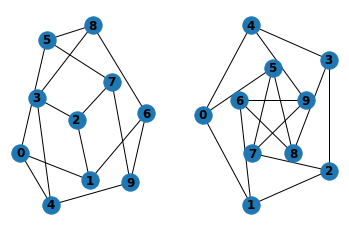

In [57]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

when drawing to an interactive display. Note that you may need to issue a Matplotlib command if you are not using matplotlib in interactive mode:

In [58]:
plt.show()

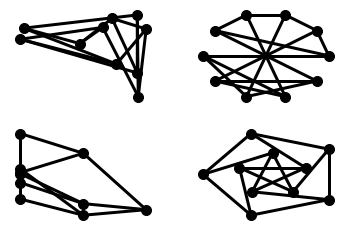

In [59]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via draw_networkx() and layouts via the layout module. You can use multiple shells with draw_shell().

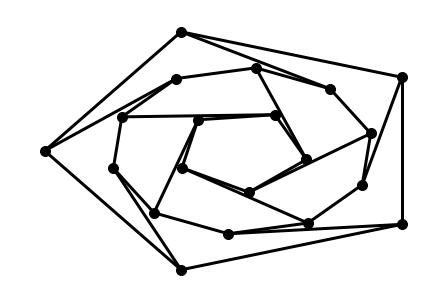

In [60]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

 ## 13. Save graph drawings
 To save drawings to a file, use, for example:

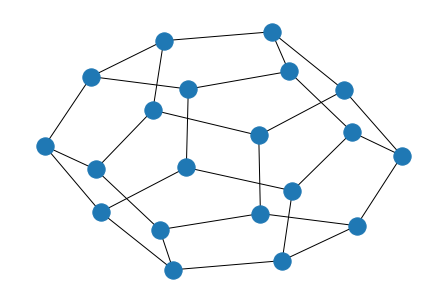

In [61]:
nx.draw(G)
plt.savefig("path.png")

The function `plt.savefig()` writes to the file _path.png_ in the local directory. If [Graphviz](https://graphviz.org/) and [PyGraphviz](https://pygraphviz.github.io/) or [pydot](https://pypi.org/project/pydot/), are available on your system, you can also use networkx.drawing.nx_agraph.graphviz_layout or networkx.drawing.nx_pydot.graphviz_layout to get the node positions, or write the graph in dot format for further processing.

In [62]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

ImportError: requires pygraphviz http://pygraphviz.github.io/